# Задание 1

## Задание 1.1

In [384]:
library(mixtools)
library(spatstat)

In [362]:
df <- read.csv("RTdata.csv", header = TRUE)

In [363]:
x <- df[, 2]

Посчитаем формулы для количества бинов для каждого метода, так как R игнорирует метод, если не передать явно.

In [388]:
scott_bw <- bw.scott.iso(ppx(x))
nbins_scott <- seq(min(x) - scott_bw,
             max(x) + scott_bw,
             by = scott_bw)

In [399]:
FD_bw <- 2 * IQR(x) / (length(x) ** (1/3))
nbins_FD <- seq(min(x) - FD_bw,
             max(x) + FD_bw,
             by = FD_bw)

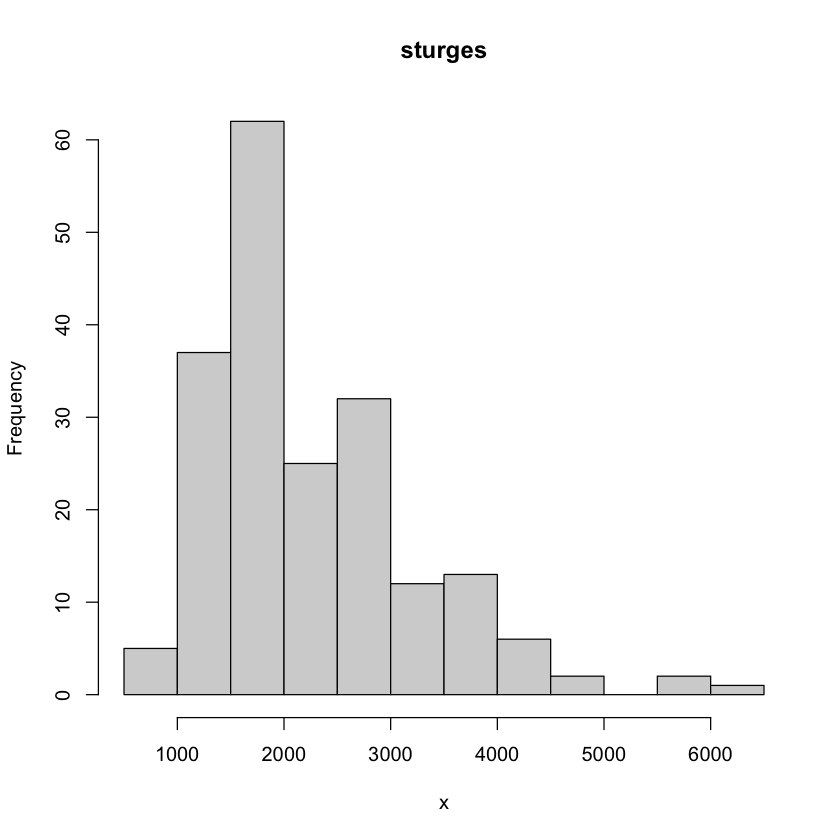

In [402]:
band = c("sturges", "scott", "freedman-diaconis")
hist(x, breaks = band[1], main = "sturges")

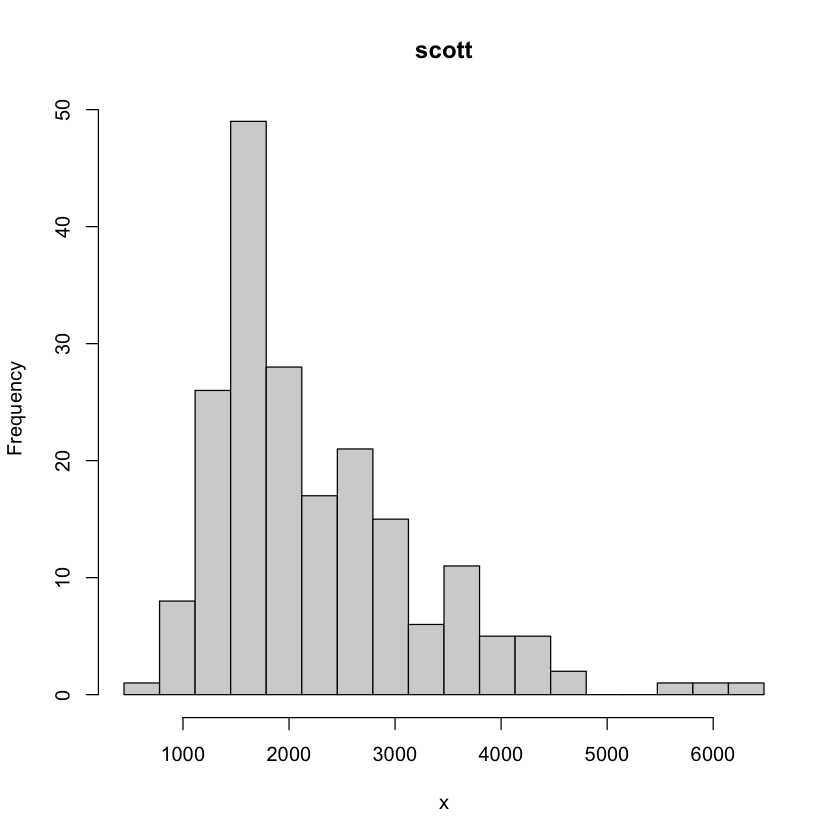

In [408]:
hist(x, breaks = nbins_scott, main = "scott")


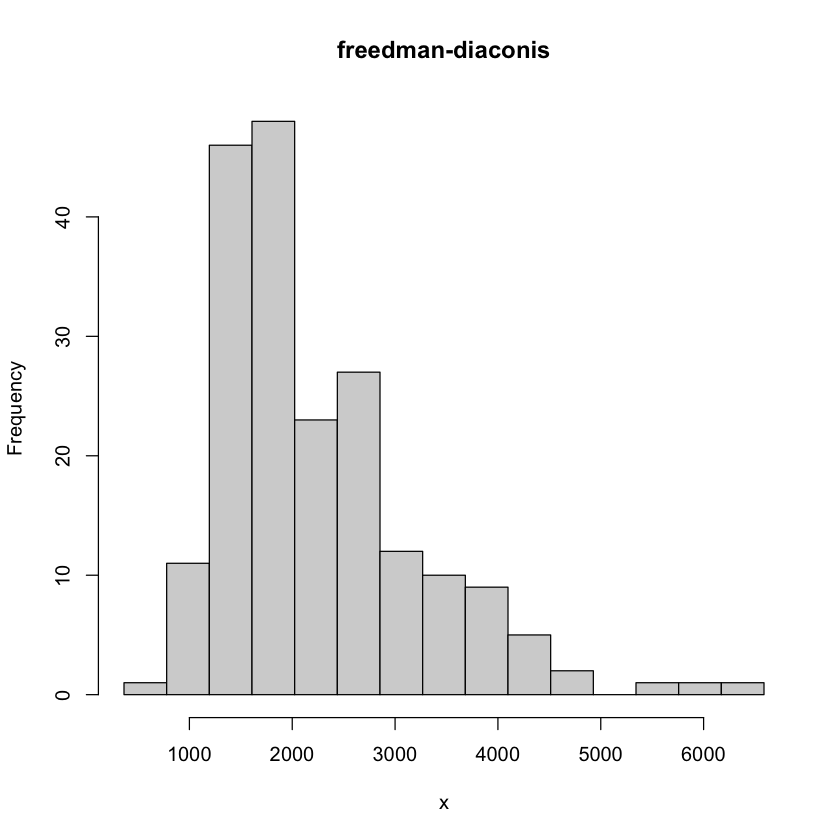

In [409]:
hist(x, breaks = nbins_FD, main = "freedman-diaconis")


Как можно легко увидеть разницы между гистограммами есть в зависимости от подхода.

## Задание 1.2

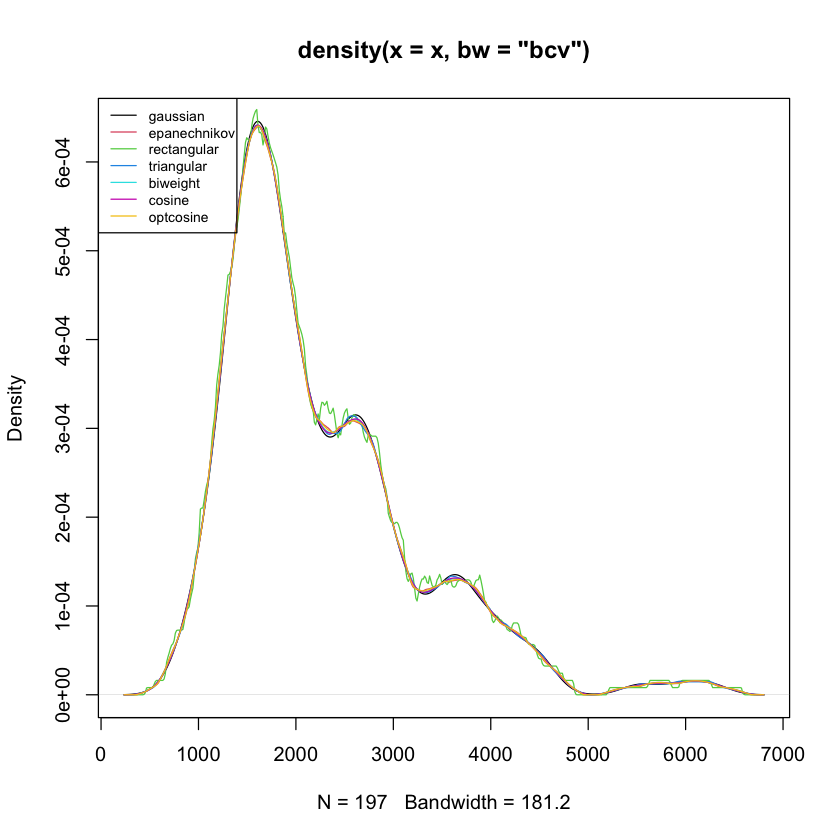

In [108]:
kernels=eval(formals(density.default)$kernel)
plot(density(x,bw="bcv"))
for (k in 2:length(kernels)){
  lines(density(x,bw="bcv",kernel=kernels[k]),col=k)
}
legend("topleft",legend=kernels,col=1:length(kernels),cex=0.7,lty=1)

Как видно примерно все ядра дают одинаковую оценку, кроме прямоугольного(оно слишком сильно переобучается)

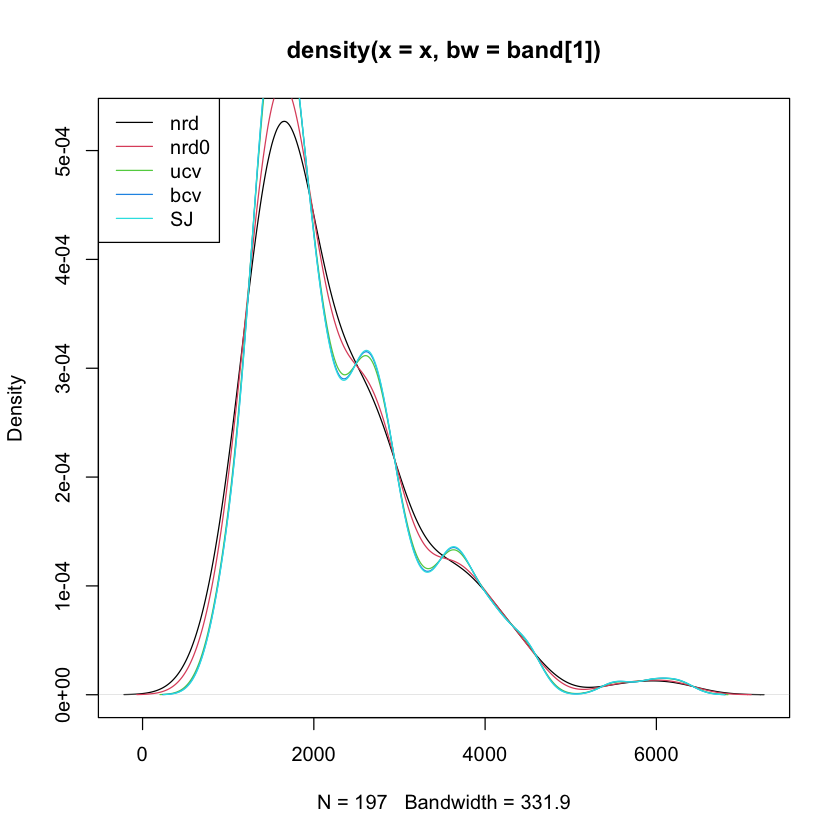

In [104]:
plot(density(x, bw = band[1]), col = 1)
band=c("nrd","nrd0","ucv","bcv","SJ")
for (k in 2:length(band)){
  lines(density(x,bw=band[k]),col=k)
}
legend("topleft",legend=band,col=1:length(band),cex=1,lty=1)

In [123]:
dens <- density(x,bw=band[1])

In [140]:
?density

density                 package:stats                  R Documentation

_K_e_r_n_e_l _D_e_n_s_i_t_y _E_s_t_i_m_a_t_i_o_n

_D_e_s_c_r_i_p_t_i_o_n:

     The (S3) generic function 'density' computes kernel density
     estimates.  Its default method does so with the given kernel and
     bandwidth for univariate observations.

_U_s_a_g_e:

     density(x, ...)
     ## Default S3 method:
     density(x, bw = "nrd0", adjust = 1,
             kernel = c("gaussian", "epanechnikov", "rectangular",
                        "triangular", "biweight",
                        "cosine", "optcosine"),
             weights = NULL, window = kernel, width,
             give.Rkern = FALSE, subdensity = FALSE,
             warnWbw = var(weights) > 0,
             n = 512, from, to, cut = 3, na.rm = FALSE, ...)
     
_A_r_g_u_m_e_n_t_s:

       x: the data from which the estimate is to be computed.  For the
          default method a numeric vector: long vect

## Задача 1.3

Построим функцию потерь для разных окон

In [198]:
band=c("nrd","nrd0","ucv","bcv","SJ")
I = matrix(NA,nrow=11,ncol=length(band))
for (i in 1:11){
    h <- hist(x, breaks = i + 9, freq = FALSE, plot = FALSE)
    count <- h$counts / length(x)
    for (k in 1:length(band)){
        d <- density(x,bw=band[k])
        values = rep(NA, length(index))
        index <- findInterval(d$x, h$breaks)
        for (j in 1:length(index)){
            if ((index[j] == 0) | index[j] > (length(count))){
                value[j] = d$y[j] ** 2
            }
            else{
                value[j] = (d$y[j] - count[index[j]]) ** 2
            }
        }
        I[i, k] = mean(value)
    }  
}
print(I)

Warning message in hist.default(x, breaks = i + 9, freq = FALSE, plot = FALSE):
"argument 'freq' is not made use of"


Warning message in hist.default(x, breaks = i + 9, freq = FALSE, plot = FALSE):
"argument 'freq' is not made use of"
Warning message in hist.default(x, breaks = i + 9, freq = FALSE, plot = FALSE):
"argument 'freq' is not made use of"
Warning message in hist.default(x, breaks = i + 9, freq = FALSE, plot = FALSE):
"argument 'freq' is not made use of"
Warning message in hist.default(x, breaks = i + 9, freq = FALSE, plot = FALSE):
"argument 'freq' is not made use of"
Warning message in hist.default(x, breaks = i + 9, freq = FALSE, plot = FALSE):
"argument 'freq' is not made use of"
Warning message in hist.default(x, breaks = i + 9, freq = FALSE, plot = FALSE):
"argument 'freq' is not made use of"
Warning message in hist.default(x, breaks = i + 9, freq = FALSE, plot = FALSE):
"argument 'freq' is not made use of"
Warning message in hist.default(x, breaks = i + 9, freq = FALSE, plot = FALSE):
"argument 'freq' is not made use of"
Warning message in hist.default(x, breaks = i + 9, freq = FALSE,

             [,1]        [,2]        [,3]        [,4]        [,5]
 [1,] 0.012359493 0.013036516 0.014057941 0.014158069 0.014165112
 [2,] 0.012359493 0.013036516 0.014057941 0.014158069 0.014165112
 [3,] 0.012359493 0.013036516 0.014057941 0.014158069 0.014165112
 [4,] 0.012359493 0.013036516 0.014057941 0.014158069 0.014165112
 [5,] 0.012359493 0.013036516 0.014057941 0.014158069 0.014165112
 [6,] 0.012359493 0.013036516 0.014057941 0.014158069 0.014165112
 [7,] 0.012359493 0.013036516 0.014057941 0.014158069 0.014165112
 [8,] 0.012359493 0.013036516 0.014057941 0.014158069 0.014165112
 [9,] 0.012359493 0.013036516 0.014057941 0.014158069 0.014165112
[10,] 0.012359493 0.013036516 0.014057941 0.014158069 0.014165112
[11,] 0.002131118 0.002216678 0.002393183 0.002423465 0.002425294


самый минимальный - с 20 бинами и nrd окном

In [203]:
kernels=eval(formals(density.default)$kernel)
I = matrix(NA,nrow=11,ncol=length(kernels))
for (i in 1:11){
    h <- hist(x, breaks = i + 9, freq = FALSE, plot = FALSE)
    count <- h$counts / length(x)
    for (k in 1:length(kernels)){
        d <- density(x,bw="bcv",kernel=kernels[k])
        values = rep(NA, length(index))
        index <- findInterval(d$x, h$breaks)
        for (j in 1:length(index)){
            if ((index[j] == 0) | index[j] > (length(count))){
                value[j] = d$y[j] ** 2
            }
            else{
                value[j] = (d$y[j] - count[index[j]]) ** 2
            }
        }
        I[i, k] = mean(value)
    }  
}
print(I)

Warning message in hist.default(x, breaks = i + 9, freq = FALSE, plot = FALSE):
"argument 'freq' is not made use of"
Warning message in hist.default(x, breaks = i + 9, freq = FALSE, plot = FALSE):
"argument 'freq' is not made use of"


Warning message in hist.default(x, breaks = i + 9, freq = FALSE, plot = FALSE):
"argument 'freq' is not made use of"
Warning message in hist.default(x, breaks = i + 9, freq = FALSE, plot = FALSE):
"argument 'freq' is not made use of"
Warning message in hist.default(x, breaks = i + 9, freq = FALSE, plot = FALSE):
"argument 'freq' is not made use of"
Warning message in hist.default(x, breaks = i + 9, freq = FALSE, plot = FALSE):
"argument 'freq' is not made use of"
Warning message in hist.default(x, breaks = i + 9, freq = FALSE, plot = FALSE):
"argument 'freq' is not made use of"
Warning message in hist.default(x, breaks = i + 9, freq = FALSE, plot = FALSE):
"argument 'freq' is not made use of"
Warning message in hist.default(x, breaks = i + 9, freq = FALSE, plot = FALSE):
"argument 'freq' is not made use of"
Warning message in hist.default(x, breaks = i + 9, freq = FALSE, plot = FALSE):
"argument 'freq' is not made use of"
Warning message in hist.default(x, breaks = i + 9, freq = FALSE,

             [,1]        [,2]        [,3]        [,4]       [,5]        [,6]
 [1,] 0.014158069 0.014158101 0.014156869 0.014158079 0.01415809 0.014158089
 [2,] 0.014158069 0.014158101 0.014156869 0.014158079 0.01415809 0.014158089
 [3,] 0.014158069 0.014158101 0.014156869 0.014158079 0.01415809 0.014158089
 [4,] 0.014158069 0.014158101 0.014156869 0.014158079 0.01415809 0.014158089
 [5,] 0.014158069 0.014158101 0.014156869 0.014158079 0.01415809 0.014158089
 [6,] 0.014158069 0.014158101 0.014156869 0.014158079 0.01415809 0.014158089
 [7,] 0.014158069 0.014158101 0.014156869 0.014158079 0.01415809 0.014158089
 [8,] 0.014158069 0.014158101 0.014156869 0.014158079 0.01415809 0.014158089
 [9,] 0.014158069 0.014158101 0.014156869 0.014158079 0.01415809 0.014158089
[10,] 0.014158069 0.014158101 0.014156869 0.014158079 0.01415809 0.014158089
[11,] 0.002423465 0.002423528 0.002423059 0.002423498 0.00242351 0.002423504
            [,7]
 [1,] 0.01415809
 [2,] 0.01415809
 [3,] 0.01415809
 [4,] 0.

Самый минимальный - для 20 бинов и прямоугольного ядра, хотя разница и не очень большая, построим самый лучший скор, то есть - nrd.

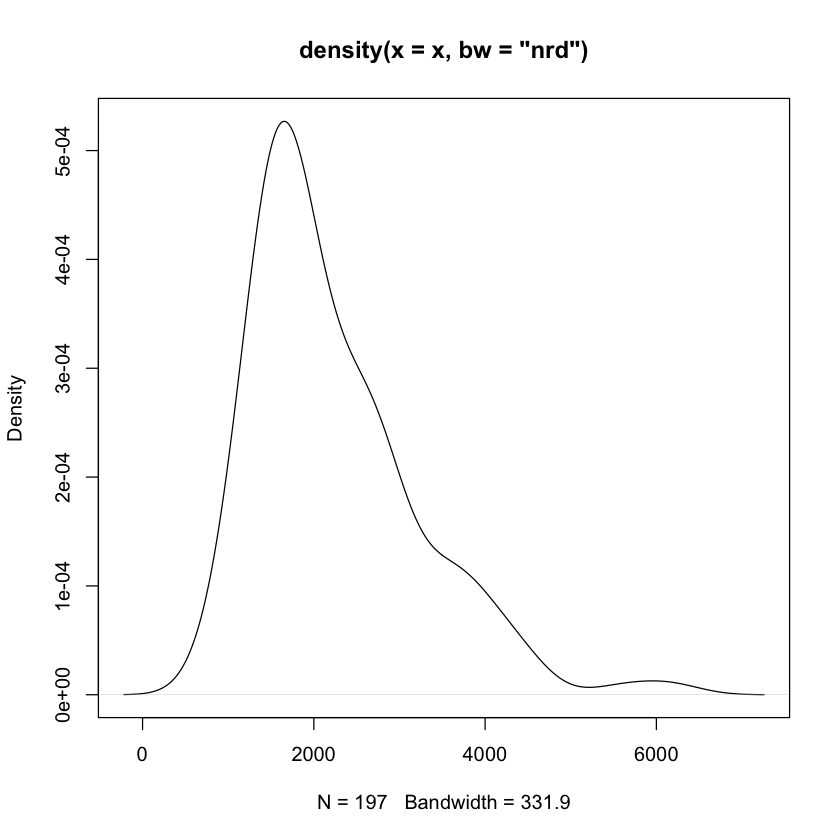

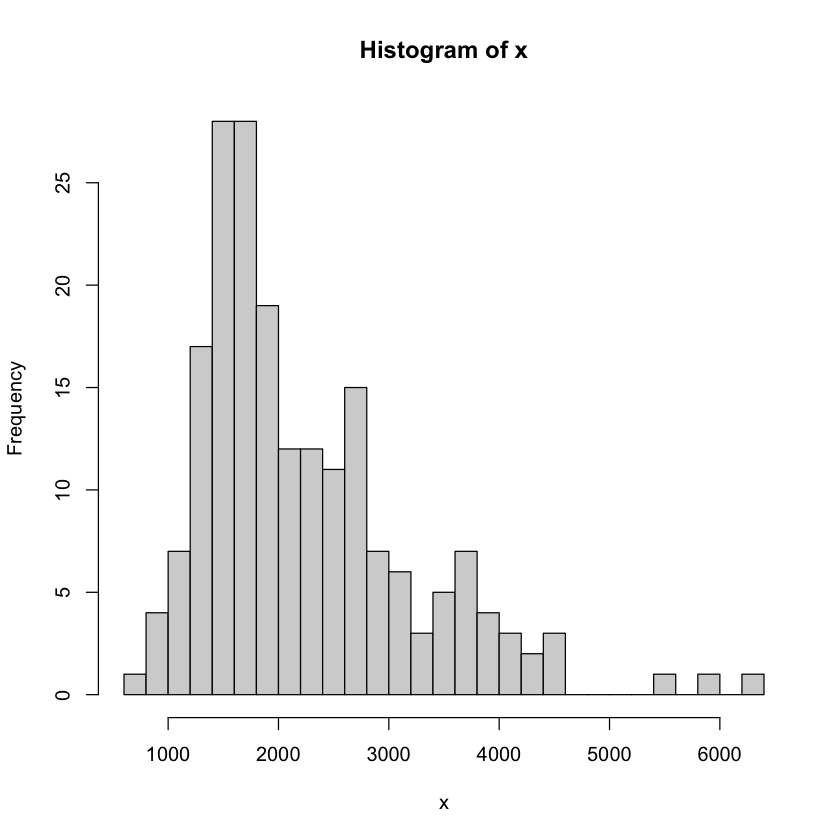

In [205]:
plot(density(x,bw="nrd"), col = 1)
plot(hist(x, breaks = 20))

Действительно похожи, можно сделать выводы о сущетвовании трех групп - от 0 до 2000, от 2000 до 3400, от 3400 до 4600.

 # Задание 2

In [1]:
library("kdensity")

In [120]:
sigma = sqrt(4)
n=1000
dist=rep(NA,n)
for (k in 1:n){
  dist[k]=rnorm(1,mean=0,sd=sigma)
}

In [121]:
K=function(u){
  return((exp(-u)*(3-3*u+u**2/2))*(u >= 0))
}

K_ep=function(u) {
  abs_u <- abs(u)
  kernel_values <- rep(0, length(u))
  kernel_values[abs_u <= 1] <- 0.75 * (1 - u[abs_u <= 1]^2)
  
  return(kernel_values)
}


In [122]:
custom_density_function <- function(x, distribution, kernel_function, h) {
  n <- length(distribution)
  density_values <- numeric(length(x))
  
  for (i in 1:length(x)) {
    density_values[i] <- sum(kernel_function((x[i] - distribution) / h)) / (n * h)
  }
  
  return(density_values)
}


In [123]:
h <- seq(from=0.1,to=5,by=0.1)
x <- seq(-3, 3, length.out = 1000)
mise_my <- rep(NA, length(h))
mise_ep <- rep(NA, length(h))

In [124]:
for (i in 1:length(h)){
    density_values_custom_ep <- custom_density_function(x, dist, K_ep,  h[i])
    density_values_custom_my <- custom_density_function(x, dist, K, h[i])
    mise_my[i] = mean((density_values_custom_my - dnorm(x)) ** 2)
    mise_ep[i] = mean((density_values_custom_ep - dnorm(x)) ** 2)
}

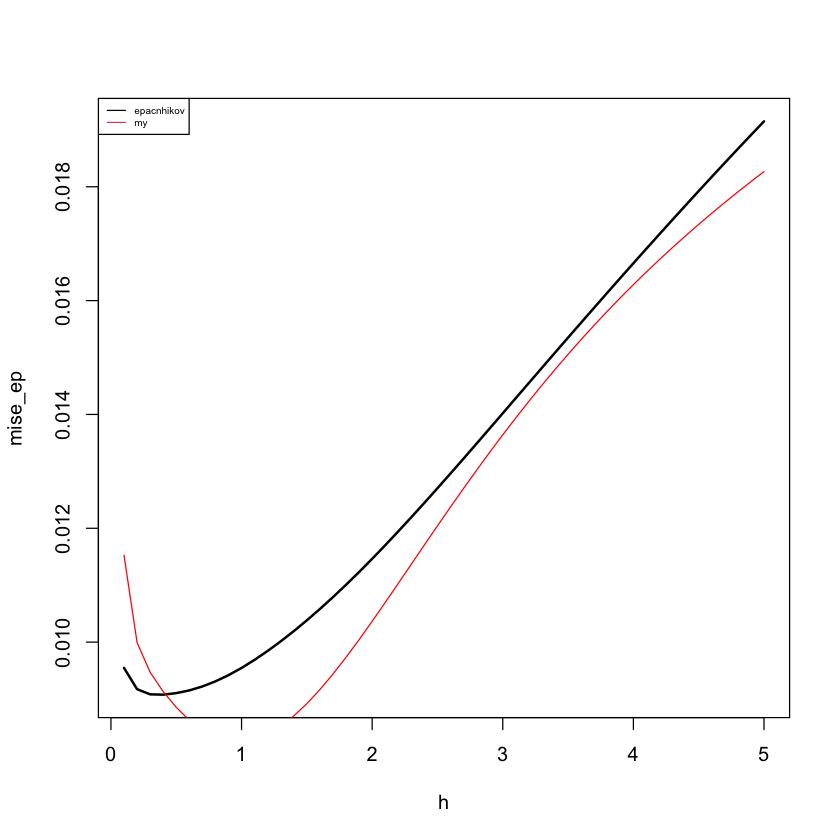

In [125]:
plot(mise_ep~h, type="l", lwd=2, col = "black")
lines(mise_my~h, type = "l", col = "red")
legend("topleft",legend=c("epacnhikov", "my"),col=1:2,cex=0.5,lty=1)

Интересное наблюдение  заключается, в том что, при росте сигма  мое ядро начинает работать лучше Епачникова.

# Задание 3

##  b)

In [354]:
library(evmix)
library(ReIns)

In [344]:
F_inv=function(y){
    if ((y > 0) & (-log(sqrt(pi/2) * y) * 2 > 0)){
        return(sqrt(-log(sqrt(pi/2) * y) * 2))
    }
}

n=1000
u=runif(n,min = 0.00000001, max = sqrt(2/pi))
x = sapply(u, F_inv)


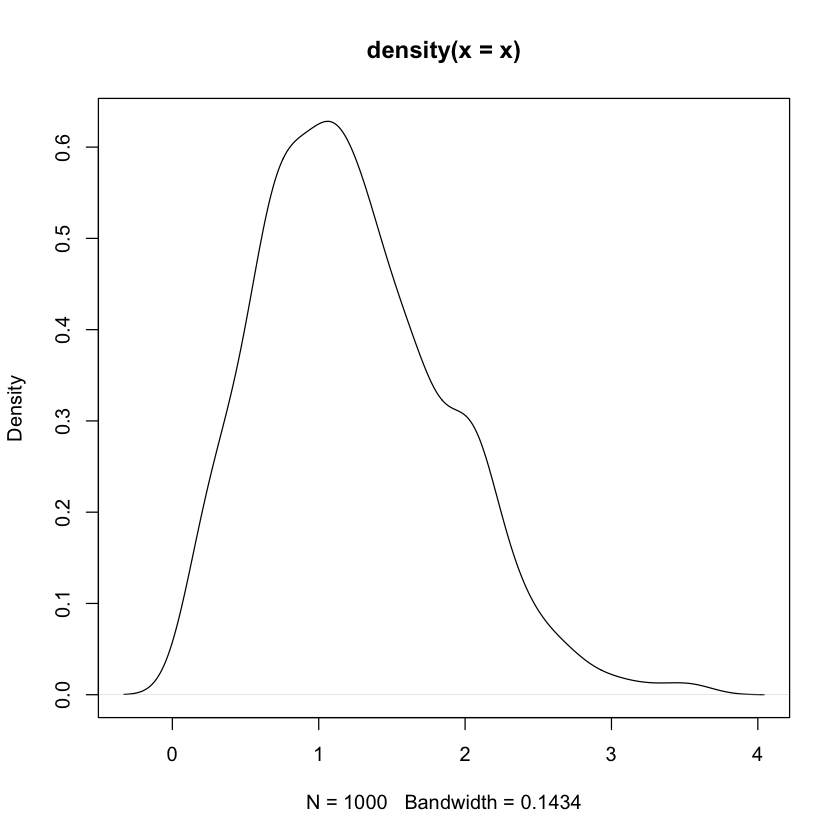

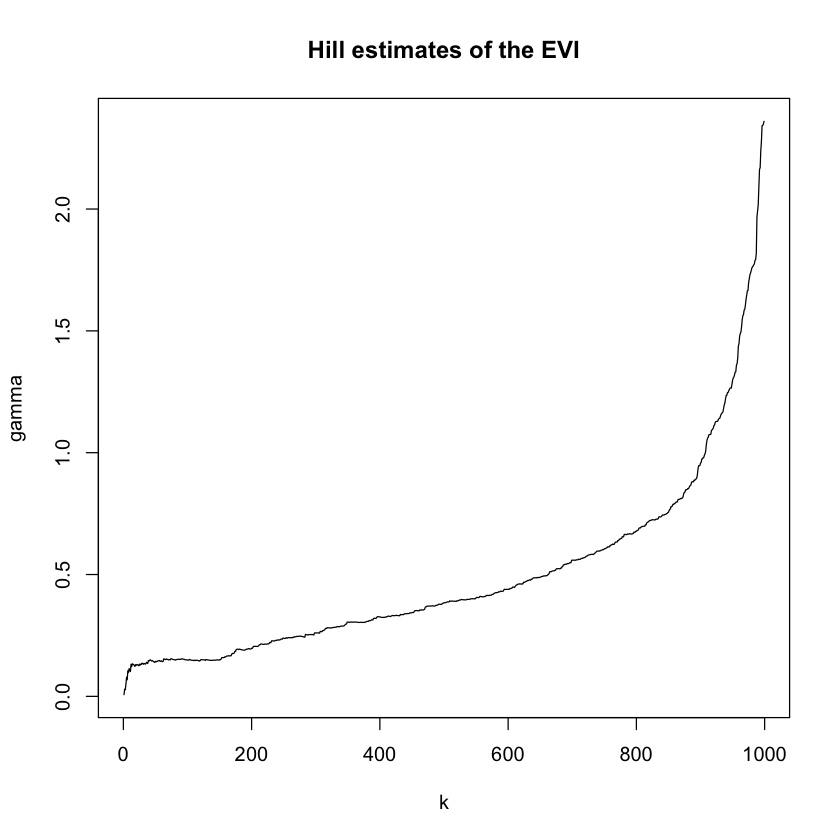

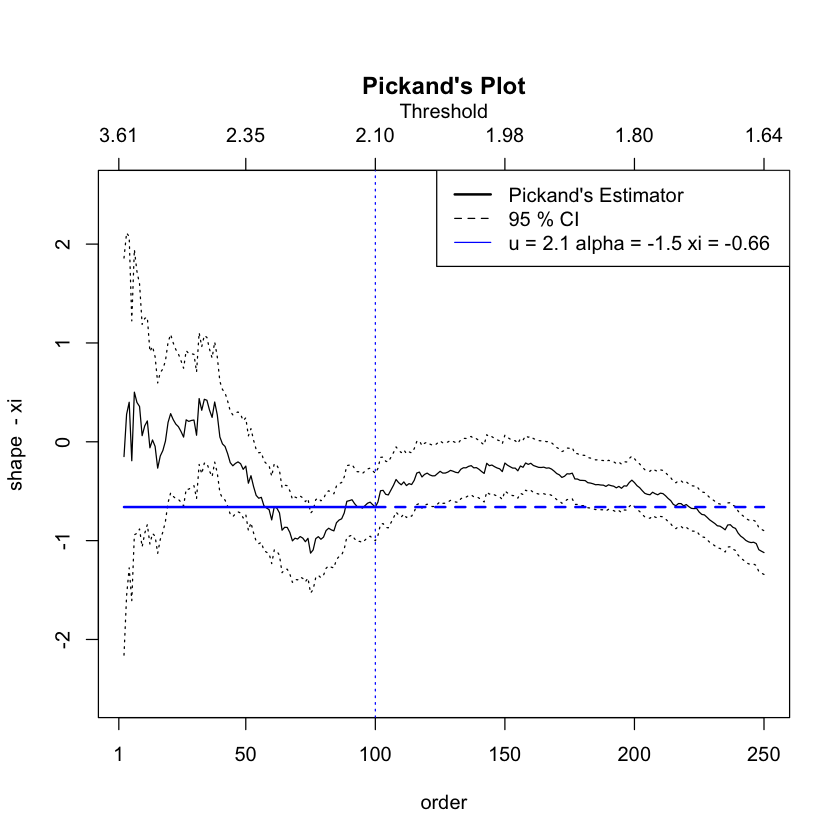

In [345]:
plot(density(x))
Hill(x,plot=TRUE)
pickandsplot(x)

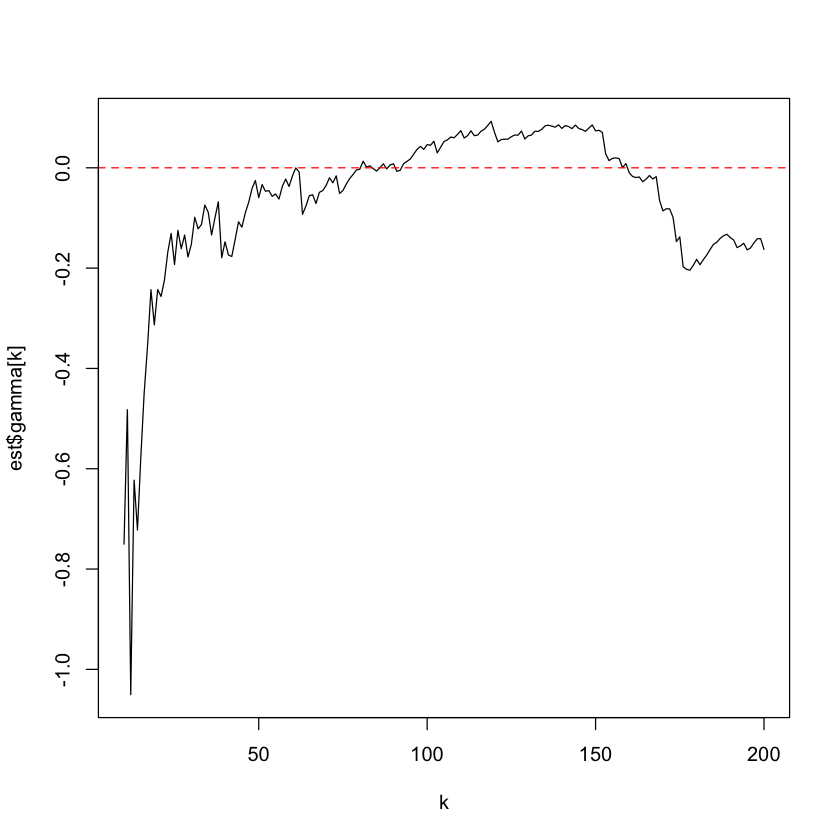

In [346]:
est=Moment(x)
k=seq(from=10,to=200,by=1)
plot(est$gamma[k]~k,type="l")
abline(0,0,col="red",lty=2)


По оценке пикфорда кси может быть равно нулю, поэтому область притяжения Гумбелля.

## С)

In [347]:
u=runif(n)
nrep=100
n=1000
max_ <- rep(NA, nrep)
for (i in 1:nrep){
    u=runif(n, min = 0.00001, max = sqrt(2/pi))
    max_[i] = max(sapply(u, F_inv))
}

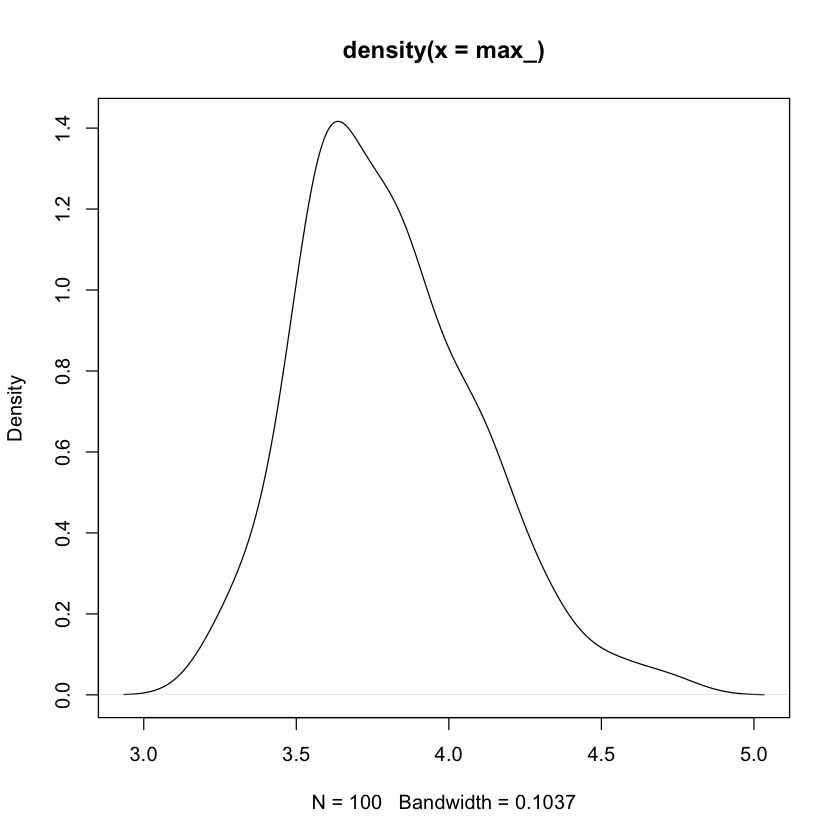

In [348]:
plot(density(max_))

In [349]:
library("evd")
library("stats")
library("fitdistrplus")
library(VGAM)



In [350]:
fitgumbel <- fitdist(max_, "gumbel", 
       start=list(location=10, scale=5))
fitgumbel  

Warning message in fitdist(max_, "gumbel", start = list(location = 10, scale = 5)):
"The pgumbel function should return a zero-length vector when input has length zero"


Fitting of the distribution ' gumbel ' by maximum likelihood 
Parameters:
          estimate Std. Error
location 3.6670448 0.02571851
scale    0.2435882 0.01857076

In [358]:
fitweibull <- fitdist(max_, "weibull", 
       start=list(scale=10, shape=5))
fitweibull  

Fitting of the distribution ' weibull ' by maximum likelihood 
Parameters:
       estimate Std. Error
scale  3.941082 0.03356441
shape 12.481936 0.86879526

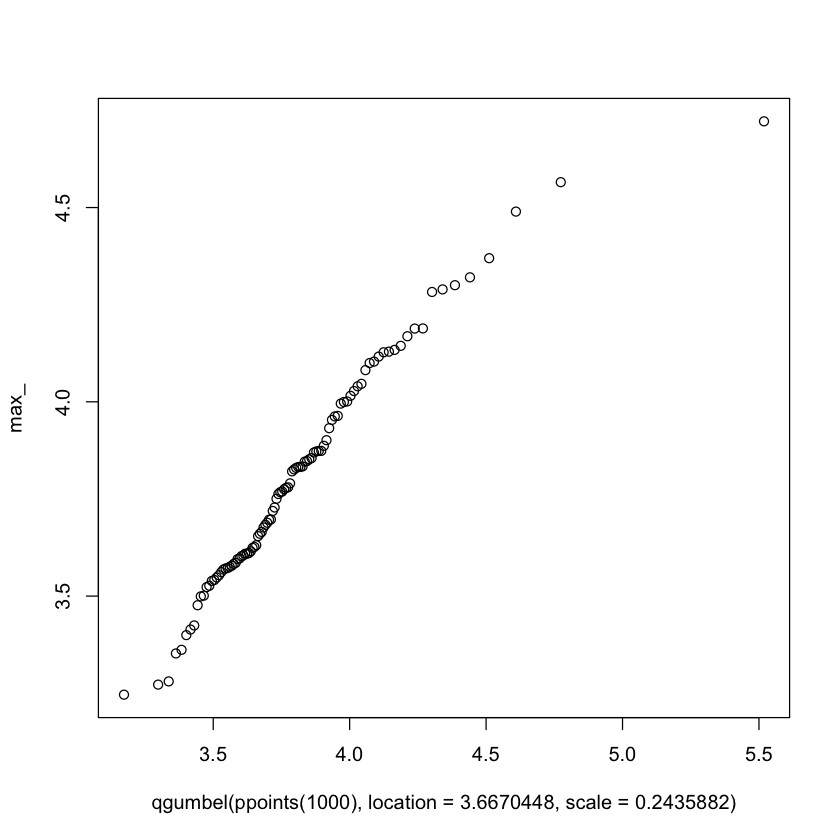

In [355]:
qqplot(qgumbel(ppoints(1000), location = 3.6670448, scale = 0.2435882), max_)

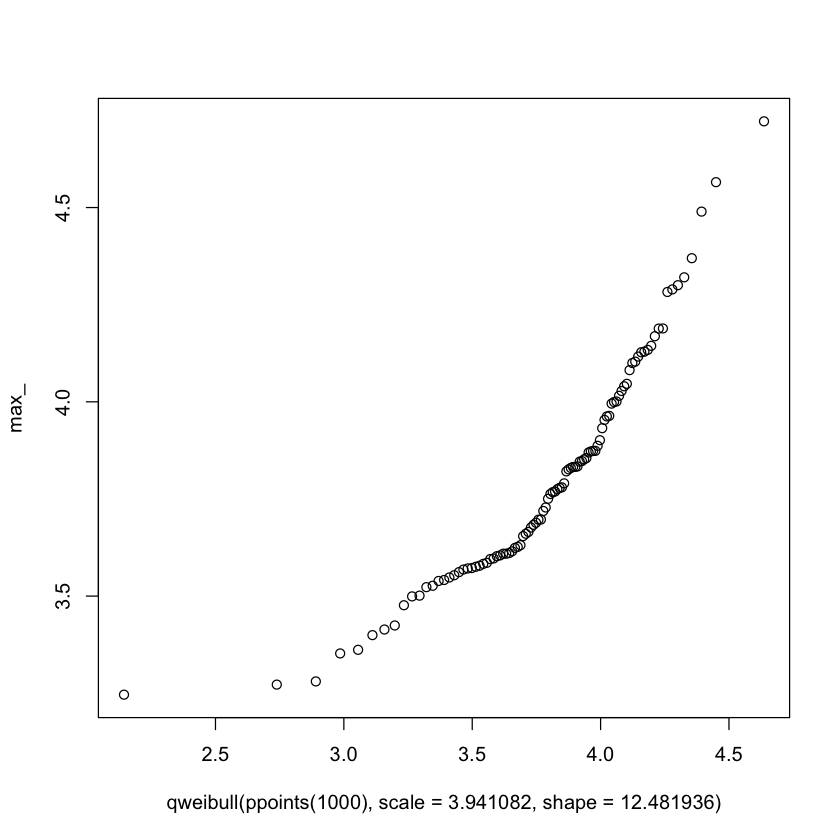

In [359]:
qqplot(qweibull(ppoints(1000), scale =  3.941082, shape = 12.481936), max_)

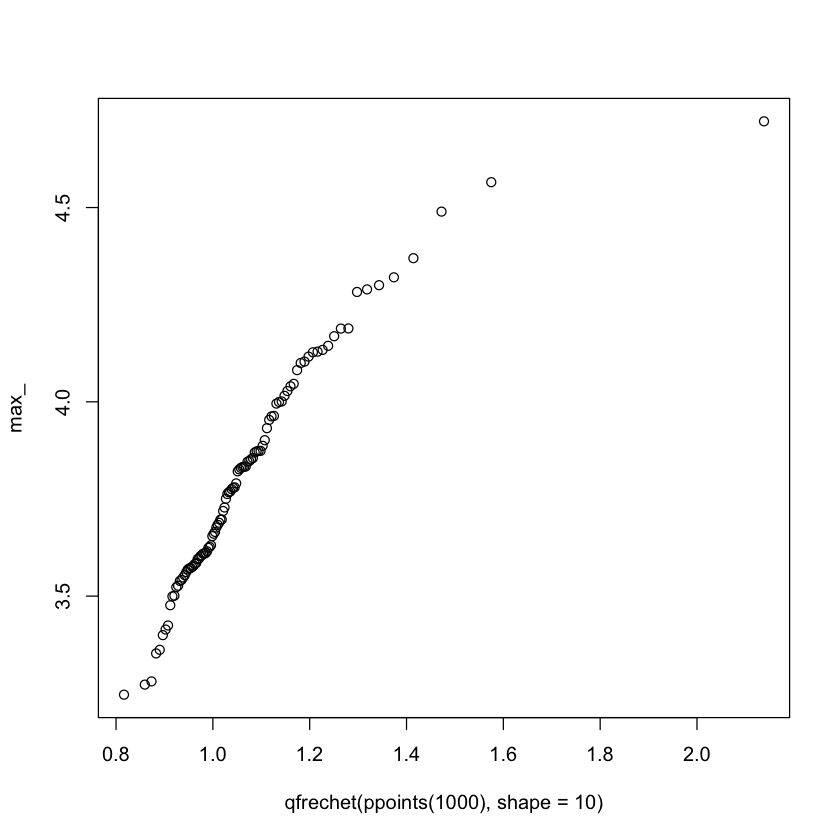

In [353]:
qqplot(qfrechet(ppoints(1000), shape = 10), max_)

Ни одно из распределений полностью не повторяет, однако наиболее похожим является Гумбель, так как Вейбул ниже линии, а фреше выше и не поодходит для больших  максимумов.

# Задание 4